# Logistic Regression 

Assume we have data points with labels $y \in \{0,1\}$ and want to do binary classification.

Logistic regression is a statistical model that uses a logistic function to model a binary dependent variable. 

A geometric interpretation of Logistic Regression is, to find a line or hyperplane which best separates the two classes. Logistic Regression works with a dataset that is almost or perfectly linear separable.

## Idea: Find a Separating Hyperplanes

Find a hyperplane that separates the data acording to our training data.

Hyperplane:

$$ w^T * x + b = 0$$


$$ \sum_{i=1}^{n} w_{i} * x_{i} + b_{i} = 0 $$

If we have found a hyperplane separating our data, then we want to calculate the probabilty that a data point lays on one side of the plane. For that we use the sigmoid function. 

## Sigmoid Function

The sigmoid function $g$ is defined as:

$$ g(z) =  \frac{1}{1 + \exp (-z)}$$

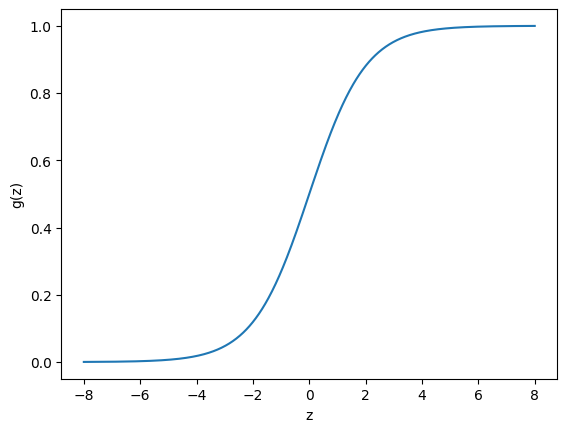

In [331]:
import numpy as np
sigmoid=lambda z: 1 / (1 +  np.exp(-z))

x = np.linspace(start=-8, stop=8, num=1000)

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(x, sigmoid(x))
ax.set_xlabel("z")
ax.set_ylabel("g(z)")
plt.show()

## Logistic Regression Model
Given the hyperplane equation, the sigmoid function gives us the probability that a data point $x$ lays on one site of the hyperplane. If the hyperplane separates the data points well into two classes $\{0,1\}$, then we can use it as classifier und predict the class by:


$$\hat{y} = h_{w,b}(x) = g(w^T * x + b)$$

Now we have a model. To learn the parameters w and b we need a loss function thta tells us how to adjust. Before we look at the loss function we reformulate the problem to get rid of parameter b.

## Reformulation

Reformultate the hyperplane equation (notational trick): with $ x \in R^{n+1}$, set $x_0 = 1$ and $\theta_0 = b$.

$$ \theta^T * x = \sum_{i=0}^{n} \theta_{i} * x_{i} = 0$$

Given data $x$, we want to learn a classifier $h_{\theta}(x) \in [0,1]$. And we have chosen the classifier or hypothesis function of the form:

$$h_{\theta}(x) = g(\theta^T x) = \frac{1}{1 + \exp (-\theta^T x)}$$

Our Goal is to learn the parameter $\theta$ (w and b) of the hyperplane. 

The sigmoid function $g$ maps each $z = \theta^T x$ to a probability $g(z)$. 

If the point x lays on the hyperplane, than $\theta^T x = 0$ than $ g(0) = \frac{1}{1 + \exp (-0)} = 0.5$. If $g(z) > 0.5$ the point is on the left and vice versa.

## Binary Cross-Entropy Loss

Given input data x, our classifier Function $h_{\theta}$ gives us the probability that the label correct classified as 1: 

$$P(y=1|x;\theta) = h_{\theta}(x)$$

or

$$P(y|x;\theta) = \begin{cases}h_{\theta}(x) & \text{if y = 1 is true}\\ 1- h_{\theta}(x) & \text{if y = 0 is true}\end{cases}$$


By definition $y \in \{0,1\}$. This leads to the (notational) compression trick:

$$P(y|x;\theta) = h_{\theta}(x)^y * (1-h_{\theta}(x))^{1-y} $$


We are searching good parameters to maximize the above equation for all data points. 

By definition we assumed that the data points are iid. 



$$P(y^{(i)}, ...,y^{(n)}|x^{(i)},...,x^{(n)};\theta) = \prod_{i=1}^{m} P(y^{(i)}|x^{(i)};\theta) $$

Interpreting this as a function of $\theta$ leads to the well-known Likelihood $L(\theta)$:

\begin{align*} 
L(\theta) &= \prod_{i=1}^{m} P(y^{(i)}|x^{(i)};\theta) \\
          &= \prod_{i=1}^{m} h_{\theta}({x^{(i)}})^{y^{(i)}} * (1-h_{\theta}({x^{(i)}})^{1-{y^{(i)}}} 
\end{align*}

So we want to maximize this function (Maximum-Likelihood Estimation). Then we use the log-trick (log is a monoton increasing function)

and log Likelihood gives us:

\begin{align*} 
l(\theta) &= \log L(\theta)  \\
          &= \log  \prod_{i=1}^{m} h_{\theta}({x^{(i)}})^{y^{(i)}} * (1-h_{\theta}({x^{(i)}})^{1-{y^{(i)}}} \\
          &= \log  \prod_{i=1}^{m} h_{\theta}({x^{(i)}})^{y^{(i)}} + \log  \prod_{i=1}^{m} (1-h_{\theta}({x^{(i)}})^{1-{y^{(i)}}} \\
          &= \sum_{i=1}^{m} \log h_{\theta}({x^{(i)}})^{y^{(i)}} + \sum_{i=1}^{m} \log (1-h_{\theta}({x^{(i)}})^{1-{y^{(i)}}} \\
          &= \sum_{i=1}^{m} y^{(i)} * \log h_{\theta}({x^{(i)}}) + (1-{y^{(i)}}) * \log (1-h_{\theta}({x^{(i)}}))
\end{align*}

Now we want to minimize the negative log Likelyhood and that gives us the Cross-Entropy Loss:

\begin{align*} 
J(\theta) &= - \sum_{i=1}^{m} y^{(i)} * \log h_{\theta}({x^{(i)}}) + (1-{y^{(i)}}) * \log (1-h_{\theta}({x^{(i)}})) \\
          &= - \sum_{i=1}^{m} y^{(i)} * \log {\hat{y}}^{(i)} + (1-{y^{(i)}}) * \log (1-{\hat{y}}^{(i)})
\end{align*}

So we want to find the best value of $\theta$ that minimizes $J(\theta)$. For that we use **Gradient Descent**!

## Logistic Regression in Python
Start with some toy data from: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html

In [338]:
from sklearn.datasets import make_classification

X_data, y_data = make_classification(n_samples=100, n_features=2, n_redundant=0, n_informative=1, n_classes=2,
                           n_clusters_per_class=1, flip_y=0.0,random_state=42)

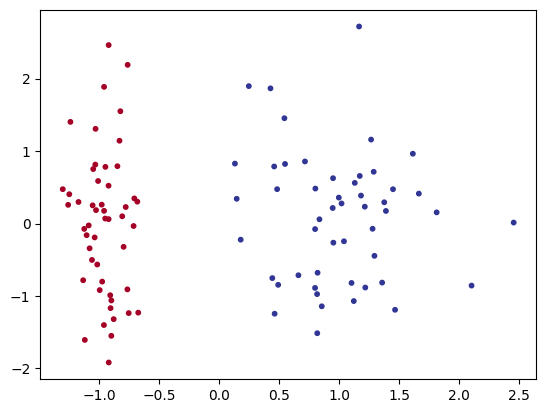

In [333]:
import matplotlib.pyplot as plt
plt.scatter(X_data[:,0], X_data[:,1], c=y_data, s=10, cmap="RdYlBu")
plt.show()

The data seems to be linear separable. We split the data into train and test und use pytorch dataloader.

## Exercise 

Implement Logistic Regression with numpy from scratch

1. Split the data into test and train data
2. Define Logistic Regression Model
3. Define Binary Cross Entropy Loss and its Gradient
4. Initialize weight at zero
5. Train 20 Epochs using Gradient Descent
6. Compute Accurance with your test data

In [375]:
################ implementation with numpy from scratch ##############
#   data X, y   
#           z   = X * w + b
#  sigmoid(z)   = 1 / (1 + exp(-z))
#
#  y_pred       = 1 / (1 + exp(- (X * w + b) ))
#
#  J(w,b)       = - 1/N sum[y * log( y_pred ) + (1-y) * log (1 - y_pred) ]
#                 - 1/N sum[y * log ( sigmoid(z) ) + (1-y) * log (1 - sigmoid(z) ]
#
#  dJ/dw        = 1/N sum( 2 X * (y_pred - y))
#  dJ/db        = 1/N sum( 2 (y_pred - y))
#
######################################################################

import numpy as np

def sigmoid(z):
    result = None          # insert activation formula here
    return result

class LogisticRegression():
    
    def __init__(self, params): # which parameters do we need?
        
        self.params = params
        self.weights = None
        self.bias = None

    def model(self, X):
        return None
        
    def fit(self, X,y):
        
        m_samples, n_features = 0, 0 # how to get m_samples, n_features
        # initialize weights and bias
        
        #iterate over epochs
        z = self.model(X)
        predictions = sigmoid(z)
        
        #compute the gradient
        if m_samples != 0:
            dw = (1/m_samples) * np.dot(X.T, predictions - y)
            db = (1/m_samples) * np.sum(predictions - y)
            
        #adjust the weights and bias
        self.weights = None
        self.bias    = None
    
    def predict(self, X):
        z = self.model(X)
        y_pred = sigmoid(z)
        result = None
        if y_pred:
            result = [0 if y < 0.5 else 1 for y in y_pred]
        return result

In [376]:
from sklearn.model_selection import train_test_split
from sklearn import datasets

bc = datasets.load_breast_cancer()
X_data, y_data = bc.data, bc.target
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

params = None

LR = LogisticRegression(params=params) #set right param !
LR.fit(X_train, y_train)

y_pred = LR.predict(X_test)

def accuracy(y_pred, y_test):
    return np.sum(y_pred == y_test)/len(y_test)

print(accuracy(y_pred, y_test))

0.0


In [377]:
########## Some Possible Solution ########
import numpy as np
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

class LogisticRegression():
    
    def __init__(self, lr=0.001, n_iter=1000):
        self.lr = lr
        self.n_iter = n_iter
        self.weights = None
        self.bias = None
        
    def fit(self, X, y):
        m_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        for _ in range(self.n_iter):
            z = np.dot(X, self.weights) + self.bias
            predictions = sigmoid(z)
            
            
            dw = (1/m_samples) * np.dot(X.T, predictions - y)
            db = (1/m_samples) * np.sum(predictions - y)
            
            self.weights = self.weights - dw * self.lr
            self.bias    = self.bias - db * self.lr
            
            
    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(z)
        return [0 if y < 0.5 else 1 for y in y_pred]
        
from sklearn.model_selection import train_test_split
from sklearn import datasets

bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)


LR = LogisticRegression(lr=0.01)
LR.fit(X_train, y_train)

y_pred = LR.predict(X_test)

def accuracy(y_pred, y_test):
    return np.sum(y_pred == y_test)/len(y_test)

print(accuracy(y_pred, y_test))

0.9210526315789473


/var/folders/gb/kf8d65y549d33zybjv_4rww80000gn/T/ipykernel_24490/622119645.py:4: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


## Logistic Regression with Pytorch

In [387]:
############################# with pytorch and own loss, model implementation 
def sigmoid(z):
    return 1 / (1 +  torch.exp(-z))
    
class LogisticRegression():
    
    def __init__(self):
        self.w = None
        self.b = None

    #### Define Logistic Regression Model
    def model(self, X):
        z = torch.matmul(X, self.w) + self.b
        return sigmoid(z)

    #### Define Cross-Entropy Loss
    def cross_entropy_loss(self, y_hat, y):
        y_hat = torch.clip(y_hat, 1e-5, 1 - 1e-5)
        l1 = torch.mul(y, torch.log(y_hat + 1e-5))
        l2 = torch.mul((1 - y), torch.log(1 - y_hat + 1e-5))
        loss = torch.mean(l1+l2, axis=0)
        return (-1) * loss   

    def train(self, train_dataloader, lr = 0.01, epochs = 100):
                
        m_batch_size = train_dataloader.batch_size
        n_features = train_dataloader.dataset.tensors[0].shape[1]
        
        self.w = torch.zeros(n_features, requires_grad=True, dtype=torch.float32)
        self.b = torch.zeros(1, requires_grad=True, dtype=torch.float32)
        
        for epoch in range(epochs):
            for X,y in train_dataloader:
                y_hat = self.model(X)
                loss = self.cross_entropy_loss(y_hat, y)
                
                loss.backward()
                with torch.no_grad():
                    self.w -= self.w.grad * lr
                    self.b -= self.b.grad * lr
                    self.w.grad.zero_()
                    self.b.grad.zero_()
            
            if epoch % 10 == 0:
                print(f"Epoch: {epoch} loss {loss}")

                
    def predict(self, X):
        with torch.no_grad():
            y_hat = self.model(X)
        return [0 if y < 0.5 else 1 for y in y_hat.numpy()]

In [388]:
###### get Testdata from sklearn
from sklearn import datasets
#bc = datasets.load_breast_cancer()
#X_data, y_data = bc.data, bc.target

from sklearn.datasets import make_classification
X_data, y_data = make_classification(n_samples=100, n_features=2, n_redundant=0, n_informative=1, n_classes=2,
                           n_clusters_per_class=1, flip_y=0.0,random_state=42)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=1234)


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [389]:
import torch
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test  = torch.tensor(X_test, dtype=torch.float32)
y_test  = torch.tensor(y_test, dtype=torch.float32)

In [390]:
#### Use torch DataLoader
#torch.manual_seed(42)
from torch.utils.data import TensorDataset, DataLoader

train_dataset = TensorDataset(X_train, y_train)
train_dataloader = DataLoader(train_dataset, batch_size=20, shuffle=False)

test_dataset = TensorDataset(X_test, y_test)
test_dataloader = DataLoader(test_dataset, batch_size=10, shuffle=False)


LR = LogisticRegression()

LR.train(train_dataloader)

def accuracy(y_p, y_t):
    return np.sum(y_p == y_t)/len(y_t)

y_p = []
y_t = []

for X, y in test_dataloader:
    y_p.extend(LR.predict(X))
    y_t.extend([int(_y) for _y in y.numpy()]) 

print(accuracy(np.array(y_p), np.array(y_t)))

w = LR.w.detach().numpy()
b = LR.b.detach().numpy()
print(w, b)

Epoch: 0 loss 0.6866399049758911
Epoch: 10 loss 0.6028708219528198
Epoch: 20 loss 0.533920407295227
Epoch: 30 loss 0.4768409729003906
Epoch: 40 loss 0.42922940850257874
Epoch: 50 loss 0.389180064201355
Epoch: 60 loss 0.35520052909851074
Epoch: 70 loss 0.3261265158653259
Epoch: 80 loss 0.3010483384132385
Epoch: 90 loss 0.27925175428390503
1.0
[1.233158   0.06141704] [0.07351342]


# Logistic Regression with much more PyTorch

In [382]:
###################### implemenetation with pytorch #####################
import torch
import torch.nn as nn
import numpy as np

####### load and prepare data #######
from sklearn.model_selection import train_test_split
from sklearn import datasets

bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

n_samples, n_features = X.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32))
y_train = torch.tensor(y_train.astype(np.float32))
X_test  = torch.tensor(X_test.astype(np.float32))
y_test  = torch.tensor(y_test.astype(np.float32))

y_train = y_train.view(y_train.shape[0],1)
y_test = y_test.view(y_test.shape[0],1)

print(X_train.shape, y_train.shape)

###### model
class LogisticRegression(nn.Module):
    
    def __init__(self, n_input_features):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(n_input_features, 1) # one output dim

    def forward(self, x):
        y_predicted = torch.sigmoid(self.linear(x))
        return y_predicted
    

model = LogisticRegression(n_features)
print(model)


########### loss and optimizer 

criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

epochs = 200

for epoch in range(epochs):
    
    #forward path
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)
    
    #backward path
    loss.backward()
    
    #update
    optimizer.step()
    
    #zero gradients
    optimizer.zero_grad()
    
    
    if epoch % 10 == 0:
        print(f"{epoch+1} loss={loss.item()}")

########### evaluation
with torch.no_grad():
    y_pred = model(X_test)
    y_pred_classes = y_pred.round()
    
    acc = y_pred_classes.eq(y_test).sum() / float(y_test.shape[0])
    print("acc", acc)
    

torch.Size([455, 30]) torch.Size([455, 1])
LogisticRegression(
  (linear): Linear(in_features=30, out_features=1, bias=True)
)
1 loss=0.644176721572876
11 loss=0.5242033004760742
21 loss=0.44827306270599365
31 loss=0.39615970849990845
41 loss=0.3581218123435974
51 loss=0.32902368903160095
61 loss=0.30593985319137573
71 loss=0.2870946526527405
81 loss=0.2713525593280792
91 loss=0.2579549252986908
101 loss=0.24637599289417267
111 loss=0.2362397462129593
121 loss=0.22727011144161224
131 loss=0.21925945580005646
141 loss=0.2120484858751297
151 loss=0.20551277697086334
161 loss=0.19955365359783173
171 loss=0.19409167766571045
181 loss=0.18906210362911224
191 loss=0.18441152572631836
acc tensor(0.9123)


# Visualize your result

In [391]:
import matplotlib.pyplot as plt
def print_2d_result(X_data, y_data, w, b):
    
    x, y = X_data.shape
    if y != 2:
        print(f"data have not dim 2, instead {y}. Please transform your data to 2 dim.")
    else:
    
        fig, ax =plt.subplots()
        ax.scatter(X_data[:,0], X_data[:,1], c=y_data, s=4, marker="o")

        # construct separating line
        x_0_1 = np.amin(X_data[:,0])
        x_0_2 = np.amax(X_data[:,0])

        x_1_1 = (-w[0] * x_0_1 - b) / w[1]
        x_1_2 = (-w[0] * x_0_2 - b) / w[1]

        ax.plot([x_0_1, x_0_2], [x_1_1, x_1_2], 'k')

        y_min = np.amin(X_data[:,1])
        y_max = np.amax(X_data[:,1])
        ax.set_ylim(y_min-3, y_max+3)

        plt.show()

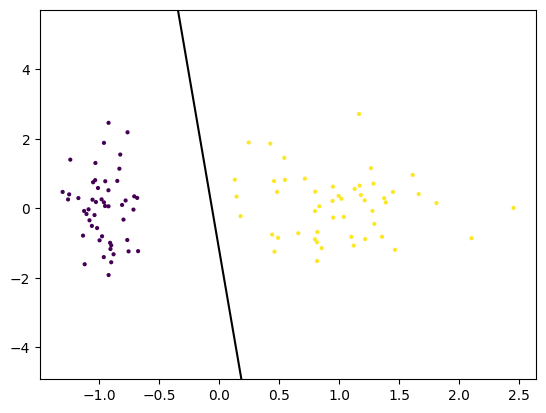

In [392]:
print_2d_result(X_data, y_data, w, b)